# Informações

- nomes: Raphael Leite da Costa Nascimento e Adriel Dos Sandos Araujo Cabral
- matrículas: 20190038319 e 20190034839
- Disciplina: Visualização de Dados

# Importações

In [1]:
import os
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Montando o data frame princial

In [2]:
data_path = 'dados'
files = [os.path.join(data_path, file) for file in os.listdir(data_path)]
files

['dados\\datatran2007.csv',
 'dados\\datatran2008.csv',
 'dados\\datatran2009.csv',
 'dados\\datatran2010.csv',
 'dados\\datatran2011.csv',
 'dados\\datatran2012.csv',
 'dados\\datatran2013.csv',
 'dados\\datatran2014.csv',
 'dados\\datatran2015.csv',
 'dados\\datatran2016.csv',
 'dados\\datatran2017.csv',
 'dados\\datatran2018.csv',
 'dados\\datatran2019.csv',
 'dados\\datatran2020.csv',
 'dados\\datatran2021.csv',
 'dados\\datatran2022.csv']

Criando uma lista de data frames e depois unindo todos em um so

In [3]:
dataframes = []

for file in files:
    try:
        dataframes.append(pd.read_csv(file, delimiter=';'))
    except:
        dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))

df_final = pd.concat(dataframes, ignore_index=True)
df_sem_duplicatas = df_final.drop_duplicates(subset='id')
df_sem_duplicatas['count'] = 1

C:\Users\Adriel\AppData\Local\Temp\ipykernel_2860\698160551.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))
C:\Users\Adriel\AppData\Local\Temp\ipykernel_2860\698160551.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))
C:\Users\Adriel\AppData\Local\Temp\ipykernel_2860\698160551.py:7: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes.append(pd.read_csv(file, delimiter=';', encoding='latin-1'))
C:\Users\Adriel\AppData\Local\Temp\ipykernel_2860\698160551.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydat

# Tratando os valores nulos 

Substituindo os valores nulos da coluna 'ano' pelo ano da coluna 'data_inversa'

In [4]:
def get_ano(year):
    
    regex1 = r'([0-9]+)(-[0-9]+)(-[0-9]+)'
    regex2 = r'([0-9])+/([0-9])+/([0-9]+)'
    
    if '-' in year:
        return str(re.search(regex1, year).group(1))
    else:
        return str('20' + re.search(regex2, year).group(3))

In [5]:
df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'ano'] = df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'data_inversa'].apply(get_ano)
df_sem_duplicatas = df_sem_duplicatas.astype({'ano': str})
df_sem_duplicatas['ano'] = df_sem_duplicatas['ano'].apply(lambda ano: ano.split('.')[0], 1)

C:\Users\Adriel\AppData\Local\Temp\ipykernel_2860\698963250.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'ano'] = df_sem_duplicatas.loc[df_sem_duplicatas['ano'].isnull(), 'data_inversa'].apply(get_ano)


In [6]:
df_sem_duplicatas['ano'].unique()

array(['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022'],
      dtype=object)

In [7]:
df_sem_duplicatas[['ano']].isnull().sum()

ano    0
dtype: int64

In [8]:
df_sem_duplicatas.columns

Index(['id', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km',
       'municipio', 'causa_acidente', 'tipo_acidente',
       'classificacao_acidente', 'fase_dia', 'sentido_via',
       'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo',
       'ano', 'pessoas', 'mortos', 'feridos_leves', 'feridos_graves', 'ilesos',
       'ignorados', 'feridos', 'veiculos', 'latitude', 'longitude', 'regional',
       'delegacia', 'uop', 'count'],
      dtype='object')

In [9]:
df_sem_duplicatas

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,count
0,10.0,11/06/2007,Segunda,15:30:00,MG,381,623.2,OLIVEIRA,Falta de atenção,Colisão frontal,...,5,0,4,6,NaN,NaN,NaN,NaN,NaN,1
2,1032898.0,13/08/2007,Segunda,14:25:00,MG,40,585.5,ITABIRITO,Outras,Saída de Pista,...,2,0,1,1,NaN,NaN,NaN,NaN,NaN,1
3,1051130.0,12/02/2007,Segunda,02:10:00,MA,135,11.0,SAO LUIS,Animais na Pista,Atropelamento de animal,...,0,0,3,1,NaN,NaN,NaN,NaN,NaN,1
4,1066824.0,20/11/2007,Terça,05:30:00,CE,222,30.8,CAUCAIA,Defeito mecânico em veículo,Capotamento,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
5,1069918.0,16/12/2007,Domingo,17:40:00,MA,230,14.0,BARAO DE GRAJAU,Outras,Capotamento,...,0,0,1,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1981187,505724.0,2022-02-04,sexta-feira,18:40:00,BA,101.0,364,GANDU,Reação tardia ou ineficiente do condutor,Colisão transversal,...,1,0,1,2,"-13,86515405","-39,49574188",SPRF-BA,DEL05-BA,UOP03-DEL05-BA,1
1981230,508874.0,2022-10-23,domingo,10:15:00,RN,405.0,134,SAO FRANCISCO DO OESTE,Transitar na contramão,Colisão frontal,...,0,0,2,2,"-5,97876709","-38,15403188",SPRF-RN,DEL04-RN,UOP02-DEL04-RN,1
1981245,510277.0,2022-10-02,domingo,01:00:00,BA,324.0,514,FEIRA DE SANTANA,Condutor deixou de manter distância do veículo...,Colisão transversal,...,1,0,2,2,"-12,23229233","-38,95215305",SPRF-BA,DEL02-BA,UOP01-DEL02-BA,1
1981292,514392.0,2022-08-05,sexta-feira,07:15:00,MG,40.0,"42,3",PARACATU,Acessar a via sem observar a presença dos outr...,Colisão transversal,...,0,1,1,2,"-17,2188441","-46,8666753",SPRF-MG,DEL14-MG,UOP01-DEL14-MG,1


In [10]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007,127671
1,2008,141038
2,2009,158646
3,2010,183465
4,2011,192322
5,2012,184561
6,2013,186745
7,2014,169197
8,2015,122158
9,2016,96362


# Graficos

In [11]:

plt.style.use('seaborn')
my_blue = '#1e83af'
my_red = '#9c1416'
my_green = '#1a7512'
cinza = '#ABA7A8'
rosa_escuro = '#CC527A'
rosa = '#E8175D'
preto_claro = '#474747'
preto = '#363636'
plt.figure(figsize=(12, 8))

<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [12]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [13]:
def grafico_simples(data: pd.core.frame.DataFrame, 
                    eixo_x: str, 
                    eixo_y: str, 
                    title:str, 
                    y_label: str, 
                    x_label: str,
                    color: str = my_blue) -> None:
    
    X, Y = data[eixo_x], data[eixo_y].values

    plt.title(title)
#     ax=plt.axes()
#     ax.set_facecolor('white')
    plt.bar(X, Y, color=color, label=eixo_y, width=0.8)
    addlabels(X, Y)
    plt.legend(loc="upper right")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation=45)
    plt.show()

In [14]:
df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

,ano,count
0,2007,127671
1,2008,141038
2,2009,158646
3,2010,183465
4,2011,192322
5,2012,184561
6,2013,186745
7,2014,169197
8,2015,122158
9,2016,96362


## Gráfico da queda dos acidentes 

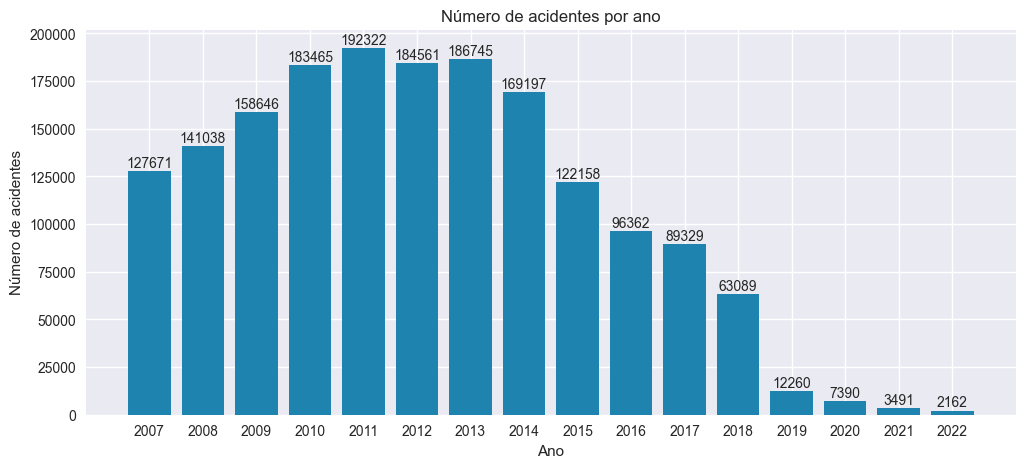

In [15]:
df_acidentes_count = df_sem_duplicatas.groupby(['ano'])['count'].sum().reset_index()

fig, ax = plt.subplots(figsize = (12, 5))
posicao = ['1#', '2#', '3#', '4#', '5#', '12#']

X, Y = df_acidentes_count['ano'], df_acidentes_count['count'].values

plt.title('Número de acidentes por ano')
plt.bar(X, Y, color=my_blue, width=0.8)

for i in range(len(X)):
        plt.text(i, Y[i] + 2000 , Y[i], ha = 'center')

plt.xlabel('Ano')
plt.ylabel('Número de acidentes')
#plt.xticks(rotation=45)
plt.show()

## Gráfico de causas de acidente 2011

In [16]:
causas_acidentes_pb = df_sem_duplicatas.loc[((df_sem_duplicatas['uf'] == 'PB') &  \
                                            (df_sem_duplicatas['ano'] == '2020'))].groupby('causa_acidente')['count'].sum().reset_index()
causas_acidentes_pb = causas_acidentes_pb.sort_values('count', ascending=False).reset_index(drop=True)
causas_acidentes_pb

,causa_acidente,count
0,Falta de Atenção à Condução,56
1,Desobediência às normas de trânsito pelo condutor,27
2,Não guardar distância de segurança,20
3,Ingestão de Álcool,19
4,Velocidade Incompatível,15
5,Defeito Mecânico no Veículo,8
6,Avarias e/ou desgaste excessivo no pneu,6
7,Condutor Dormindo,5
8,Pista Escorregadia,5
9,Desobediência às normas de trânsito pelo pedestre,3


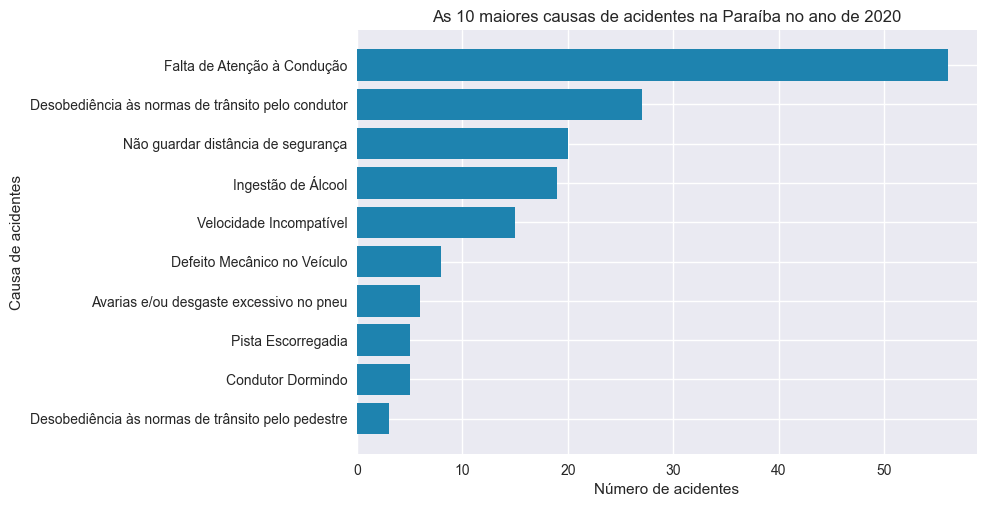

In [17]:
df_graph = causas_acidentes_pb.iloc[:10, :].sort_values('count', ascending=True).reset_index(drop=True)
#grafico_simples(df_graph, 'causa_acidente', 'mortos', 'Gráfico de causas de acidente 2011')

plt.title('As 10 maiores causas de acidentes na Paraíba no ano de 2020')
plt.barh(df_graph['causa_acidente'], df_graph['count'].values, color=my_blue)
plt.xlabel('Número de acidentes')
plt.ylabel('Causa de acidentes')
#plt.xticks(rotation=45)
plt.show()

In [18]:
acidentes_by_uf = df_sem_duplicatas.groupby('uf')['count'].sum().reset_index()
acidentes_by_uf = acidentes_by_uf.sort_values('count', ascending=False).reset_index(drop=True)
acidentes_by_uf

,uf,count
0,MG,252512
1,SC,188415
2,PR,177819
3,RJ,151458
4,RS,136835
5,SP,129847
6,BA,95729
7,GO,77919
8,ES,73337
9,PE,69498


### Os 5 estados que acontecem mais acidentes + PB

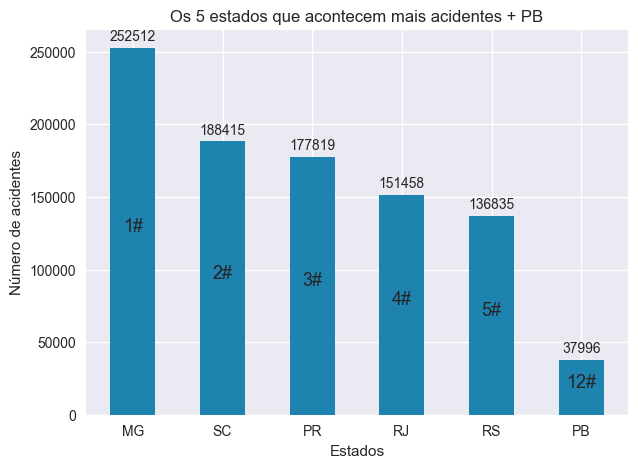

In [19]:
fig, ax = plt.subplots(figsize = (7, 5))
posicao = ['1#', '2#', '3#', '4#', '5#', '12#']

df_5_estados = acidentes_by_uf.loc[acidentes_by_uf['uf'].isin(['MG', 'SC', 'PR', 'RJ', 'RS', 'PB'])]
X, Y = df_5_estados['uf'], df_5_estados['count'].values

plt.title('Os 5 estados que acontecem mais acidentes + PB')
plt.bar(X, Y, color=my_blue, width=0.5)

for i in range(len(X)):
        plt.text(i, Y[i] + 5000 , Y[i], ha = 'center')
for i in range(len(posicao)):
        plt.text(i, Y[i] / 2, posicao[i], ha = 'center', fontsize=13)
        
plt.xlabel('Estados')
plt.ylabel('Número de acidentes')
#plt.xticks(rotation=45)
plt.show()

## Gráficos da Paraiba

In [20]:
df_sem_duplicatas_PB = df_sem_duplicatas.loc[df_sem_duplicatas['uf'] == 'PB'].reset_index(drop=True)

In [21]:
df_sem_duplicatas_PB['municipio'] = df_sem_duplicatas_PB['municipio'].map(lambda nome: nome.strip())

In [22]:

df_pessoas = df_sem_duplicatas_PB.groupby(['ano'])['pessoas'].sum().reset_index()
df_mortos = df_sem_duplicatas_PB.groupby(['ano'])['mortos'].sum().reset_index()
df_feridos = df_sem_duplicatas_PB.groupby(['ano'])['feridos'].sum().reset_index()
df_ilesos = df_sem_duplicatas_PB.groupby(['ano'])['ilesos'].sum().reset_index()
df_ignorados = df_sem_duplicatas_PB.groupby(['ano'])['ignorados'].sum().reset_index()


anos = df_mortos['ano'].values
anos = [str(ano) for ano in anos]

In [23]:
df_total_pessoas = pd.concat([df_pessoas, 
                              df_mortos.drop(columns=['ano']), 
                               df_ignorados.drop(columns=['ano']),
                              df_feridos.drop(columns=['ano']), 
                              df_ilesos.drop(columns=['ano'])], 1)

C:\Users\Adriel\AppData\Local\Temp\ipykernel_2860\3110689255.py:1: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df_total_pessoas = pd.concat([df_pessoas,


In [24]:
df_total_pessoas

,ano,pessoas,mortos,ignorados,feridos,ilesos
0,2007,5853,164,173,1898,3618
1,2008,7027,185,345,2130,4366
2,2009,7592,202,372,2314,4703
3,2010,8048,194,443,2315,5096
4,2011,8202,176,449,2429,5148
5,2012,8542,223,430,2565,5324
6,2013,8973,180,539,2681,5573
7,2014,7740,182,428,2383,4746
8,2015,5874,170,393,2075,3235
9,2016,4335,156,394,1790,1995


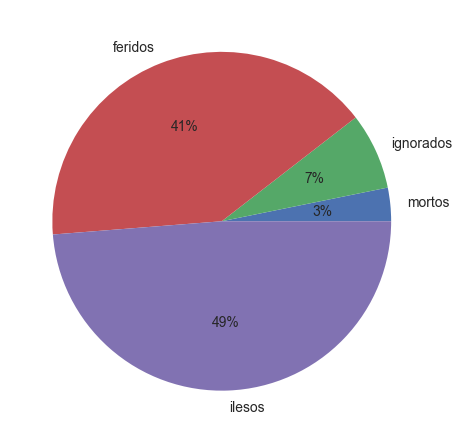

In [25]:
plt.pie(df_total_pessoas.iloc[10, 2:], labels = df_total_pessoas.columns[2:], autopct='%.0f%%')
plt.show()

In [26]:
df_total_pessoas_percent = df_total_pessoas.copy()

df_total_pessoas_percent['mortos'] = df_total_pessoas_percent['mortos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['ilesos'] = df_total_pessoas_percent['ilesos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['feridos'] = df_total_pessoas_percent['feridos'] / df_total_pessoas_percent['pessoas']
df_total_pessoas_percent['ignorados'] = df_total_pessoas_percent['ignorados'] / df_total_pessoas_percent['pessoas']

In [27]:
df_total_pessoas_percent.index = df_total_pessoas_percent['ano']
df_total_pessoas_percent.drop(columns=['ano', 'pessoas'], inplace=True)
df_total_pessoas_percent = df_total_pessoas_percent * 100
df_total_pessoas_percent

,mortos,ignorados,feridos,ilesos
ano,,,,
2007,2.801982,2.955749,32.427815,61.814454
2008,2.632702,4.909634,30.311655,62.131777
2009,2.660695,4.899895,30.479452,61.946786
2010,2.410537,5.504473,28.764911,63.320080
2011,2.145818,5.474275,29.614728,62.765179
2012,2.610630,5.033950,30.028096,62.327324
2013,2.006018,6.006910,29.878524,62.108548
2014,2.351421,5.529716,30.788114,61.317829
2015,2.894110,6.690501,35.325162,55.073204


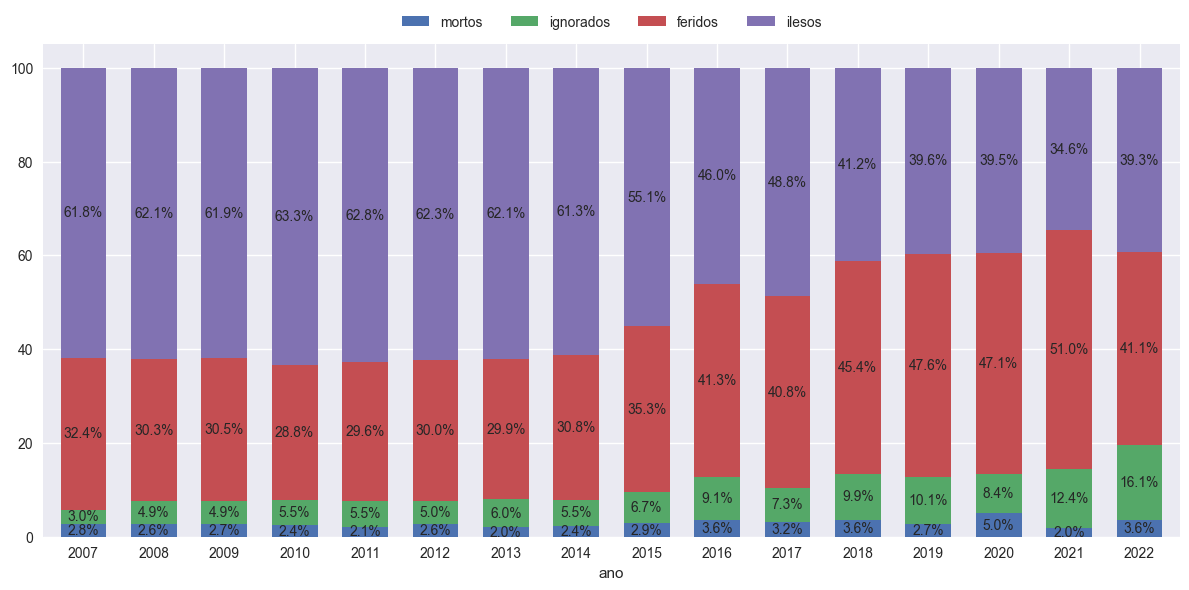

In [28]:
fig, ax = plt.subplots(figsize = (12, 6))

df_total_pessoas_percent.plot.bar(stacked=True, width=0.65, ax = ax)

plt.legend(
    bbox_to_anchor=(0.5, 1.02),
    loc="lower center",
    borderaxespad=0,
    frameon=False,
    ncol=4,
)

plt.xticks(rotation=-360)

for ix, row in df_total_pessoas_percent.reset_index(drop=True).iterrows():
    cumulative = 0
    for element in row:
        if element == element and element > 0.01:
            plt.text(
                ix,
                cumulative + element / 2,
                f"{np.round(element, 1)}%",
                va="center",
                ha="center",
            )
        cumulative += element
        
plt.tight_layout()

In [29]:
# grafico_simples(df_pessoas, 'ano', 'pessoas', 
#                 'Quantidade de pessoas que sofreram acidente na PB entre 2007 e 2020')

### Número de mortos, feridos e ilesos a cada ano na Paraíba

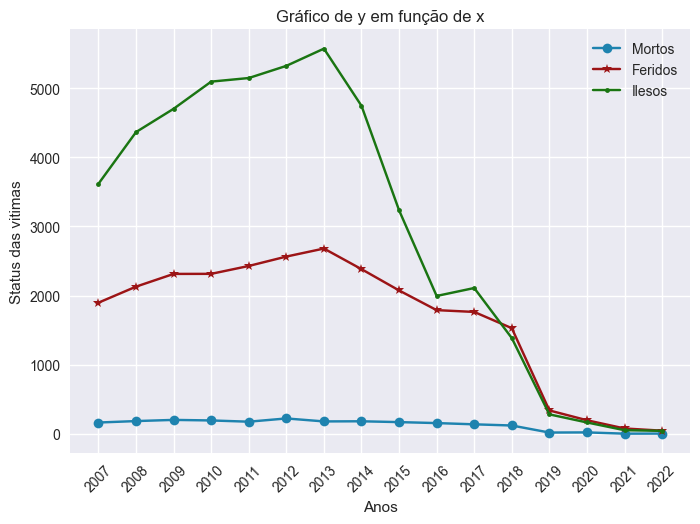

In [30]:
plt.title('Gráfico de y em função de x')
plt.plot(anos, df_mortos['mortos'].values, marker='o', color=my_blue, label="Mortos")
plt.plot(anos, df_feridos['feridos'].values, marker='*', color=my_red, label="Feridos")
plt.plot(anos, df_ilesos['ilesos'].values, marker='.', color=my_green, label="Ilesos")
plt.legend(loc="upper right")
plt.xlabel('Anos')
plt.ylabel('Status das vitimas')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [31]:
df_sem_duplicatas_PB

,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_acidente,tipo_acidente,...,ilesos,ignorados,feridos,veiculos,latitude,longitude,regional,delegacia,uop,count
0,174007.0,01/01/2007,Segunda,18:30:00,PB,230,153.4,CAMPINA GRANDE,Outras,Colisão Transversal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
1,174064.0,02/01/2007,Terça,02:20:00,PB,101,85.9,BAYEUX,Animais na Pista,Atropelamento de animal,...,2,0,2,2,NaN,NaN,NaN,NaN,NaN,1
2,174133.0,02/01/2007,Terça,07:35:00,PB,230,138.2,CAMPINA GRANDE,Outras,Saída de Pista,...,1,0,0,1,NaN,NaN,NaN,NaN,NaN,1
3,174141.0,01/01/2007,Segunda,16:30:00,PB,101,112.9,ALHANDRA,Ultrapassagem indevida,Colisão frontal,...,0,0,1,2,NaN,NaN,NaN,NaN,NaN,1
4,174304.0,02/01/2007,Terça,11:30:00,PB,230,136.6,CAMPINA GRANDE,Outras,Capotamento,...,0,0,2,1,NaN,NaN,NaN,NaN,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37991,492354.0,2022-12-12,segunda-feira,08:55:00,PB,101.0,83,BAYEUX,Ausência de reação do condutor,Colisão traseira,...,1,0,1,2,"-7,1337703","-34,92963914",SPRF-PB,DEL01-PB,UOP01-DEL01-PB,1
37992,492752.0,2022-12-14,quarta-feira,13:05:00,PB,230.0,"165,8",CAMPINA GRANDE,Acessar a via sem observar a presença dos outr...,Colisão lateral mesmo sentido,...,0,1,1,2,"-7,20168","-35,95202",SPRF-PB,DEL02-PB,UOP02-DEL02-PB,1
37993,494279.0,2022-12-21,quarta-feira,18:10:00,PB,230.0,"153,9",CAMPINA GRANDE,Condutor deixou de manter distância do veículo...,Colisão traseira,...,1,0,2,2,"-7,2763","-35,8887",SPRF-PB,DEL02-PB,UOP01-DEL02-PB,1
37994,494697.0,2022-12-23,sexta-feira,11:00:00,PB,230.0,203,POCINHOS,Reação tardia ou ineficiente do condutor,Saída de leito carroçável,...,2,0,1,2,"-7,0962","-36,2621",SPRF-PB,DEL02-PB,UOP02-DEL02-PB,1


In [32]:
def split_time(time):
    
    time_int = int(''.join(time.split(':')[:2]))
    
    if 0 < time_int < 600:
        return '00-06'
    elif 600 < time_int < 800:
        return '06-08'
    elif 800 < time_int < 1200:
        return '08-12'
    elif 1200 < time_int < 1600:
        return '12-16'
    elif 1600 < time_int < 2000:
        return '16-20'
    elif 2000 < time_int < 2400:
        return '20-24'


In [33]:
df_sem_duplicatas_PB['time_split'] = df_sem_duplicatas_PB['horario'].apply(lambda time: split_time(time), 1)

In [34]:
df_sem_duplicatas_PB['time_split'].value_counts()

16-20    10395
12-16     6917
08-12     6896
20-24     4234
00-06     4018
06-08     3876
Name: time_split, dtype: int64

In [35]:
import geopandas as gpd

In [36]:
INFOS_UFS = gpd.read_file('bcim_2016_21_11_2018.gpkg', layer='lim_unidade_federacao_a')

In [37]:
INFOS_UFS.columns

Index(['nome', 'nomeabrev', 'geometriaaproximada', 'sigla', 'geocodigo',
       'id_produtor', 'id_elementoprodutor', 'cd_insumo_orgao',
       'nr_insumo_mes', 'nr_insumo_ano', 'tx_insumo_documento', 'geometry'],
      dtype='object')

In [38]:
df_sem_duplicatas = df_sem_duplicatas.rename(columns={"uf": "sigla"})

In [39]:
df_sem_duplicatas_ufs = df_sem_duplicatas.groupby(['sigla'])['pessoas'].sum().reset_index()
df_sem_duplicatas_ufs = df_sem_duplicatas_ufs.iloc[1:, :].reset_index(drop=True)

In [40]:
df_sem_duplicatas_ufs

,sigla,pessoas
0,AC,11946
1,AL,44941
2,AM,6755
3,AP,6869
4,BA,224107
5,CE,81977
6,DF,36441
7,ES,159635
8,GO,175440
9,MA,63804


In [41]:
df_sem_duplicatas_merged = INFOS_UFS.merge(df_sem_duplicatas_ufs, 
                                           on='sigla', 
                                           how='left')

In [42]:
df_sem_duplicatas_merged

,nome,nomeabrev,geometriaaproximada,sigla,geocodigo,id_produtor,id_elementoprodutor,cd_insumo_orgao,nr_insumo_mes,nr_insumo_ano,tx_insumo_documento,geometry,pessoas
0,Goiás,NaN,Sim,GO,52,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-50.15876 -12.41581, -50.15743...",175440
1,Mato Grosso do Sul,NaN,Sim,MS,50,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-56.09815 -17.17220, -56.09159...",80055
2,Paraná,NaN,Sim,PR,41,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-52.08090 -22.52893, -52.04903...",385377
3,Minas Gerais,NaN,Sim,MG,31,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-44.21152 -14.22955, -44.20750...",522476
4,Sergipe,NaN,Sim,SE,28,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-38.00366 -9.51544, -38.00052 ...",33380
5,Alagoas,NaN,Sim,AL,27,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-35.45878 -8.81780, -35.45898 ...",44941
6,Tocantins,NaN,Sim,TO,17,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-48.34644 -5.17871, -48.34311 ...",27526
7,Roraima,NaN,Sim,RR,14,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-60.17793 5.23024, -60.16619 5...",9726
8,Amazonas,NaN,Sim,AM,13,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-67.32285 2.04176, -67.29220 1...",6755
9,Acre,NaN,Sim,AC,12,1000001,NaN,NaN,NaN,NaN,NaN,"MULTIPOLYGON (((-73.73811 -7.13471, -72.90246 ...",11946


<AxesSubplot:>

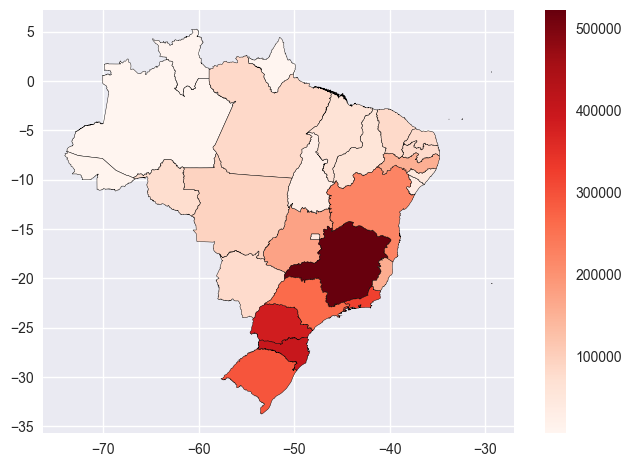

In [43]:
df_sem_duplicatas_merged.plot(column='pessoas',
                             cmap='Reds',
                             legend=True,
                             edgecolor='black')